<div class="alert alert-block alert-info" style="margin-top: 20px">
<p><h1>Business Intelligence Case - Second Crop Corn</h1>
</p>
</div>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h1>Table of Contents</h1>
    <ol>
        <li><a href="#context">Context</a></li>
        <li><a href="#objective">Objective</a></li>
        <li><a href="#preprocessing">Data Preprocessing</a></li>
        <li><a href="#anual">Years Analysis</a></li>
        <ol>
            <li><a href="#anualDescription">Years Volumes Results</a></li>
            <li><a href="#deliveryYears">Delivery Years Analysis</a></li>
            <ol>
                <li><a href="#deliveryYearsResult">Delivery Years Results</a></li>
            </ol>
        </ol>
        <li><a href="#month">Month Analysis</a></li>
        <ol>
            <li><a href="#month_1">From 2015 to 2018</a></li>
            <ol>
                <li><a href="#results_oct">October Volumes Results</a></li>
            </ol>
            <li><a href="#month_2">From 2019 to 2022</a></li>
        </ol>
        <li><a href="#month_3">Quarter Analysis: 2019 to 2022</a></li>
        <ol>
            <li><a href="#quarter_results">Second Quarter Volumes Results</a></li>
        </ol>
        <li><a href="#polyreg">2023 Prediction: Polynomial Regression</a></li>
    </ol>
</div>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<h1><a id="context">Context</a></h1>
<b> Suppose we are evaluating the hiring of a consultancy with the objective of creating a sales wave prediction model for
    the fertilizer market, and we are going to run a POC (Proof of Concept).
    The available database (BD Milho Safrinha 2014-2022 - v2) presents the historical weekly sales data of the fertilizer
    market from 2014 to 2022 for the second-crop corn (Milho Safrinha) in the state of Paraná.</b>
</div>

<div class="alert alert-block alert-warning" style="margin-top: 20px">
<h1><a id="objective">Objective</a></h1>
<ul>
    <li><b>Analyze the historical data available in the shared database</b></li>
    <li><b>Develop business-related recommendations/insights</b></li>
    <li><b>Which statistical forecasting models can partners apply to the data in question and why?</b></li>
</ul>


<div class="alert alert-block alert-info" style="margin-top: 20px">
<h1><a id="preprocessing">Data Preprocessing</a></h1>

In [2]:
# IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [4]:
df = pd.read_excel("BD Milho Safrinha 2014-2022 - v2.xlsx")
df.head()

,ANO,Mês,Ajuste Sem,UF,Ano Entrega,CULT/CONCORRENTE,VOLUME (com fator)
0,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 1º semestre,93791786.20
1,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 2º semestre,7632243.00
2,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 1º semestre,245927.83
3,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 1º semestre,35701936.70
4,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 1º semestre,30995386.85


In [5]:
# CHECKING MISSING DATA

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ANO                 2182 non-null   int64  
 1   Mês                 2182 non-null   int64  
 2   Ajuste Sem          2182 non-null   int64  
 3   UF                  2182 non-null   object 
 4   Ano Entrega         2182 non-null   int64  
 5   CULT/CONCORRENTE    2182 non-null   object 
 6   VOLUME (com fator)  2182 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 119.5+ KB


In [6]:
Quarter = []

for i in df['Mês']:
    if i == 0:
        x = 0
    elif i <= 3:
        x = 1
    elif i <= 6:
        x = 2
    elif i <= 9:
        x=3
    elif i <= 12:
        x=4
    Quarter.append(x)

df['Quarter'] = Quarter

df.head()

,ANO,Mês,Ajuste Sem,UF,Ano Entrega,CULT/CONCORRENTE,VOLUME (com fator),Quarter
0,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 1º semestre,93791786.20,0
1,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 2º semestre,7632243.00,0
2,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 1º semestre,245927.83,0
3,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 1º semestre,35701936.70,0
4,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 1º semestre,30995386.85,0


In [7]:
df[df['CULT/CONCORRENTE'] == 'MILHO SAFRINHA']['ANO'].value_counts()

# We don't have the delivery semester indication for 2015, 2016 and 2016.

2016    259
2015    236
2014    185
Name: ANO, dtype: int64

In [8]:
df_deliver = df[['ANO', 'Ano Entrega']]
ind_deliver = []

for i, row in df_deliver.iterrows():
    if (row['ANO'] == row['Ano Entrega']):
        x = 1
    else:
        x = 0
    ind_deliver.append(x)

df['DeliverySameYear'] = ind_deliver

df.head()

,ANO,Mês,Ajuste Sem,UF,Ano Entrega,CULT/CONCORRENTE,VOLUME (com fator),Quarter,DeliverySameYear
0,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 1º semestre,93791786.20,0,1
1,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 2º semestre,7632243.00,0,1
2,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 1º semestre,245927.83,0,1
3,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 1º semestre,35701936.70,0,1
4,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 1º semestre,30995386.85,0,1


In [9]:
df['VOLUME (com fator)'].describe()

count    2.182000e+03
mean     3.767349e+06
std      8.509514e+06
min      4.648655e+02
25%      4.240135e+05
50%      1.272040e+06
75%      3.349707e+06
max      1.060034e+08
Name: VOLUME (com fator), dtype: float64

In [10]:
df.groupby(['ANO','Mês'])['VOLUME (com fator)'].sum().describe()

count    1.110000e+02
mean     7.405726e+07
std      8.638610e+07
min      1.696054e+04
25%      1.403230e+07
50%      4.161777e+07
75%      1.027262e+08
max      4.435181e+08
Name: VOLUME (com fator), dtype: float64

In [11]:
df = df.rename(columns = {"ANO":"Year",
                          "Mês":"Month",
                          "Ajuste Sem":"WeeklyAdjustment",
                          "UF":"State",
                          "Ano Entrega":"DeliveryYear",
                          "CULT/CONCORRENTE":"DeliveryCropSemester",
                          "VOLUME (com fator)":"SalesVolume"})
df.head()

,Year,Month,WeeklyAdjustment,State,DeliveryYear,DeliveryCropSemester,SalesVolume,Quarter,DeliverySameYear
0,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 1º semestre,93791786.20,0,1
1,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 2º semestre,7632243.00,0,1
2,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 1º semestre,245927.83,0,1
3,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 1º semestre,35701936.70,0,1
4,2022,0,0,PR,2022,MILHO SAFRINHA - Entregas no 1º semestre,30995386.85,0,1


In [12]:
df["DeliveryCropSemester"].replace("MILHO SAFRINHA","Corn Crop", inplace=True)
df["DeliveryCropSemester"].replace("MILHO SAFRINHA - Entregas no 1º semestre","Corn Crop - 1º Semester Deliver", inplace=True)
df["DeliveryCropSemester"].replace("MILHO SAFRINHA - Entregas no 2º semestre","Corn Crop - 2º Semester Deliver", inplace=True)
df.head()

,Year,Month,WeeklyAdjustment,State,DeliveryYear,DeliveryCropSemester,SalesVolume,Quarter,DeliverySameYear
0,2022,0,0,PR,2022,Corn Crop - 1º Semester Deliver,93791786.20,0,1
1,2022,0,0,PR,2022,Corn Crop - 2º Semester Deliver,7632243.00,0,1
2,2022,0,0,PR,2022,Corn Crop - 1º Semester Deliver,245927.83,0,1
3,2022,0,0,PR,2022,Corn Crop - 1º Semester Deliver,35701936.70,0,1
4,2022,0,0,PR,2022,Corn Crop - 1º Semester Deliver,30995386.85,0,1


<h1> Resumo Dataframe </h1>
<br>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li> <b>Year</b>: 2014 - 2022 </li>
        <li> <b>Month</b>: 0 - 12 </li>
        <li> <b>WeeklyAdjustment</b>: 0 - 53 </li>
        <li> <b>State</b>: PR </li>
        <li> <b>DeliveryYear</b>: 2014 - 2023 </li>
        <li> <b>DeliveryCropSemester</b>:
            <ul>
            <li> Corn Crop </li>
            <li> Corn Crop - 1º Semester Deliver </li>	
            <li> Corn Crop - 2º Semester Deliver </li>	
            </ul>
        </li>
        <li> <b>SalesVolume: continuous values</b> </li>
        <li> <b>Quarter</b>: 0 - 4 </li>
        <li> <b>DeliverySameYear</b>: 0 - 1 </li>
        <ul>
            <li> 0: DeliveryYear > Year </li>	
            <li> 1: DeliveryYear = Year </li>	
        </ul>
    </ul>
</div>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h1><a id='anual'> Years Analysis </a> </h1>

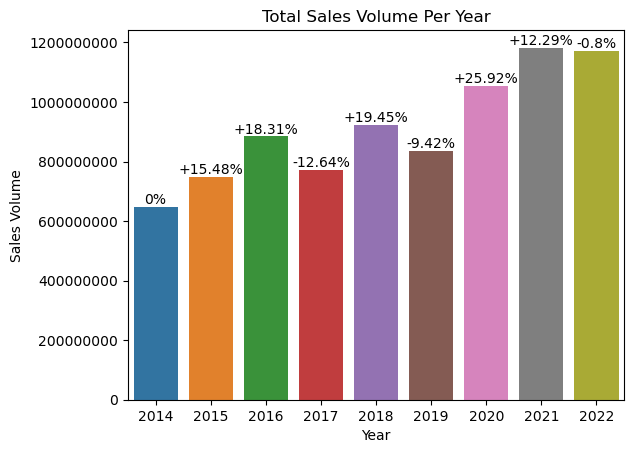

In [13]:
pct_list = []
df_group = df.groupby('Year')['SalesVolume'].sum()

for year in df_group.index:
    if year == 2014:
        x = 0
    else:
        x = (100 * (df_group[year] - df_group[(year - 1)]))/df_group[(year - 1)]
    if x > 0:
        x = "+" + str(round(x,2)) + "%"
    else:
        x = str(round(x,2)) + "%"
    pct_list.append(x)

ax = sns.barplot(x='Year', y='SalesVolume', data=df, errorbar=None, estimator="sum")
ax.bar_label(ax.containers[0], labels=pct_list)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Total Sales Volume Per Year')
plt.xlabel('Year')
plt.ylabel('Sales Volume')
plt.show()

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h1> <a id="anualDescription">Years Volumes Results </a></h1><br>
    <ul>
        <li><b>2014</b>:</li>
        <ul>
            <li>Total: <b>647,497,447.41</b></li>
        </ul>
        <br>
        <li> <b>2015</b>: <b><font color = "#32CD32"> + </font>15.48%</b> </li>
        <ul>
            <li>Total: <b>747,762,223.70</b> </li>
        </ul>
        <br>
        <li> <b>2016</b>: <b><font color = "#32CD32"> + </font>18.31%</b> </li>
        <ul>
            <li>Total: <b>884,685,511.15</b> </li>
        </ul>
        <br>
        <li> <b>2017</b>: <b><font color = "red"> - </font>12.64%</b> </li>
        <ul>
            <li>Total: <b>772,819,725.50</b></li>
        </ul>
        <br>
        <li> <b>2018</b>: <b><font color = "#32CD32"> + </font>19.45%</b> </li>
        <ul>
            <li>Total: <b>923,118,094.8</b></li>
        </ul>
        <br>        
        <li> <b>2019</b>: <b><font color = "red"> - </font>9.41%</b> </li>
        <ul>
            <li>Total: <b>836,205,503.62</b></li>
        </ul>
        <br>          
        <li> <b>2020</b>: <b><font color = "#32CD32"> + </font>25.99%</b> </li>
        <ul>
            <li>Total: <b>1,052,948,472.51</b></li>
        </ul>
        <br> 
        <li> <b>2021</b>: <b><font color = "#32CD32"> + </font>12.29%</b> </li>
        <ul>
            <li>Total: <b>1,182,395,565.83</b></li>
        </ul>
        <br> 
    </ul>
    
<ul>
    <li><b> Highest Volume:</b> 2021 </li>
    <li><b> Lowest Volume:</b> 2014 </li>
</ul>
<br>
    
<ul>
    <li> <b>Overall Performance</b>: <b><font color = "#32CD32"> + </font></b>81.15% </li>
</ul>
<br>
    
<ul>
    <li><b> Stronger Decreasing: </b> 2017 </li>
    <li><b> Stronger Increasing: </b> 2020 </li>
</ul>
    
</div>

In [14]:
print("2014: ", df_group[2014])
print("2015: ", df_group[2015])
print('2015: ', pct_list[1])
print("2016: ", df_group[2016])
print('2016: ', pct_list[2])
print("2017: ", df_group[2017])
print('2017: ', pct_list[3])
print("2018: ", df_group[2018])
print('2018: ', pct_list[4])
print("2019: ", df_group[2019])
print('2019: ', pct_list[5])
print("2020: ", df_group[2020])
print('2020: ', pct_list[6])
print("2021: ", df_group[2021])
print('2021: ', pct_list[7])
print('2022 - 2014: ', (100 * (df_group[2022] - df_group[2014]))/df_group[2014] )

2014:  647497447.418
2015:  747762223.709
2015:  +15.48%
2016:  884685511.155152
2016:  +18.31%
2017:  772819725.5016079
2017:  -12.64%
2018:  923118094.796
2018:  +19.45%
2019:  836205503.62
2019:  -9.42%
2020:  1052948472.5070872
2020:  +25.92%
2021:  1182395565.83
2021:  +12.29%
2022 - 2014:  81.14713948560248


<div class="alert alert-block alert-info" style="margin-top: 20px">
<h1><a id="deliveryYears">Delivery Year Analysis</a></h1>

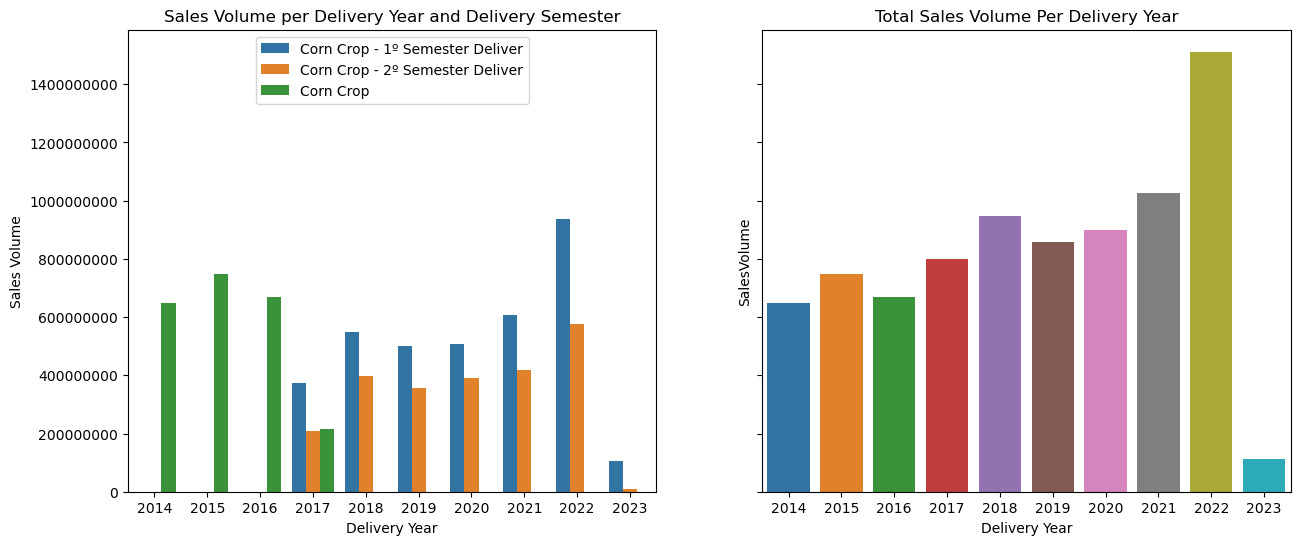

In [15]:
fig,axs = plt.subplots(1,2, figsize=(15,6), sharey=True)

sns.barplot(x='DeliveryYear', y='SalesVolume', hue = 'DeliveryCropSemester', data=df, errorbar=None, estimator="sum", ax=axs[0])
axs[0].ticklabel_format(style='plain', axis='y')
axs[0].set_title('Sales Volume per Delivery Year and Delivery Semester')
axs[0].set_xlabel('Delivery Year')
axs[0].set_ylabel('Sales Volume')
axs[0].legend(loc='upper center')

sns.barplot(x='DeliveryYear', y='SalesVolume', data=df, errorbar=None, estimator="sum", ax=axs[1])
axs[1].set_title('Total Sales Volume Per Delivery Year')
axs[1].set_xlabel('Delivery Year')

plt.show()

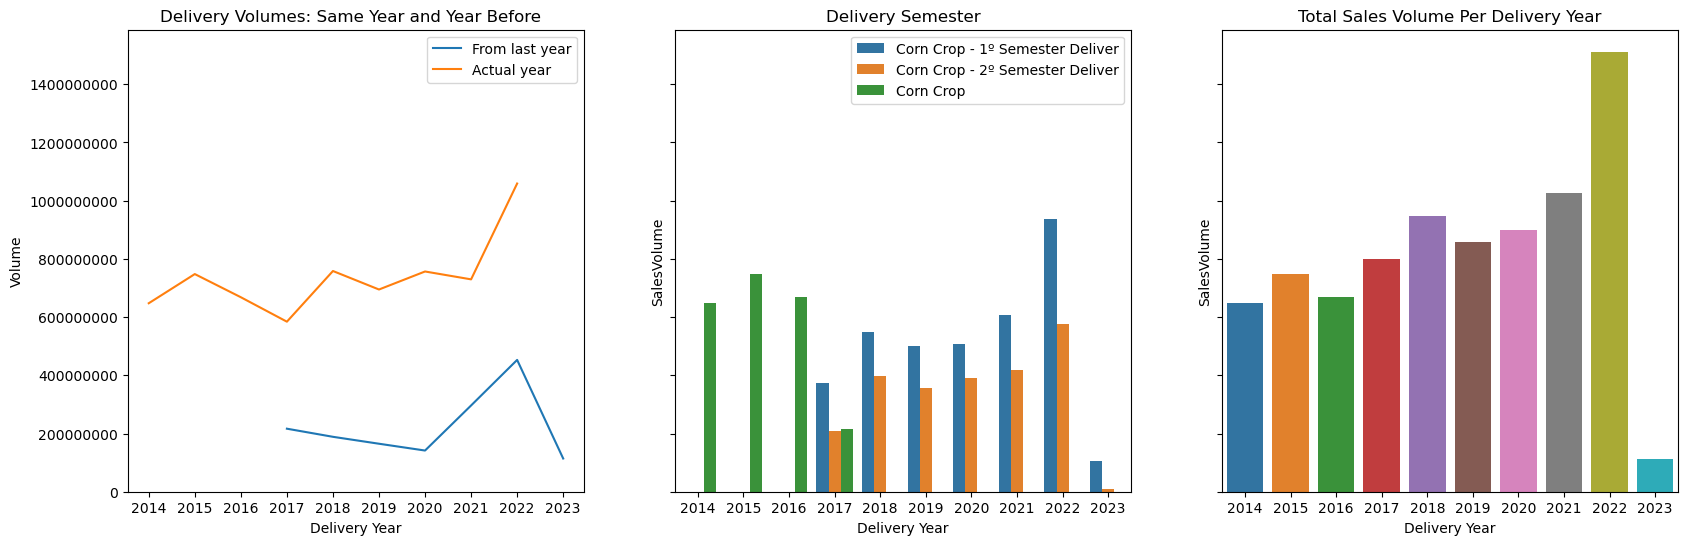

In [16]:
fig,axs = plt.subplots(1,3, figsize=(20,6), sharey=True)

sns.lineplot(x='DeliveryYear', y='SalesVolume', hue = 'DeliverySameYear', data=df, errorbar=None, estimator="sum", ax=axs[0])
axs[0].ticklabel_format(style='plain', axis='y')
axs[0].set_title('Delivery Volumes: Same Year and Year Before  ')
axs[0].set_xlabel('Delivery Year')
axs[0].set_ylabel('Volume')
axs[0].set_xticks(range(2014,2024))
axs[0].legend(['From last year','Actual year'], loc=1)


sns.barplot(x='DeliveryYear', y='SalesVolume', hue = 'DeliveryCropSemester', data=df, errorbar=None, estimator="sum", ax=axs[1])
axs[1].ticklabel_format(style='plain', axis='y')
axs[1].set_title('Delivery Semester')
axs[1].set_xlabel('Delivery Year')
axs[1].legend(loc=1)

sns.barplot(x='DeliveryYear', y='SalesVolume', data=df, errorbar=None, estimator="sum", ax=axs[2])
axs[2].set_title('Total Sales Volume Per Delivery Year')
axs[2].set_xlabel('Delivery Year')

plt.show()

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h1><a id="deliveryYearsResult"> Delivery Years Volumes: Same year and from the year before</a></h1><br>
    <ul>
        <li><b>2017 Delivery</b></li>
        <ul>
            <li> Total Volume: <b>800,701,157.20</b> </li>
            <li> Delivery from 2017 Sales: <b>72.96%</b> </li>
            <li> Delivery from 2016 Sales: <b>27.04%</b> </li>
        </ul>
        <br>     
        <li><b>2018 Delivery</b></li>
        <ul>
            <li> Total Volume: <b>946,901,860.04</b> </li>
            <li> Delivery from 2018 Sales: <b>80.08%</b> </li>
            <ul>
                <li> 1º Semester: <b>55.29%</b> </li>
                <li> 2º Semester: <b>44.71%</b> </li>
            </ul>
            <li> Delivery from 2017 Sales: <b>19.92%</b> </li>
            <ul>
                <li> 1º Semestre: <b>68.95%</b> </li>
                <li> 2º Semestre: <b>31.05%</b> </li>
            </ul>
        </ul>
        <br> 
        <li><b>2019 Delivery</b></li>
        <ul>
            <li> Total Volume: <b>859,585,608.01</b> </li>
            <li> Delivery from 2019 Sales: <b>80.82%</b> </li>
            <ul>
                <li> 1º Semester: <b>49.12%</b> </li>
                <li> 2º Semester: <b>50.88%</b> </li>
            </ul>
            <li> Delivery from 2018 Sales: <b>19.18%</b> </li>
            <ul>
                <li> 1º Semestre: <b>97.69%</b> </li>
                <li> 2º Semestre: <b>2.31%</b> </li>
            </ul>
        </ul>
        <br> 
        <li><b>2020 Delivery</b></li>
        <ul>
            <li> Total Volume: <b>898,107,222.58</b> </li>
            <li> Delivery from 2020 Sales: <b>84.25%</b> </li>
            <ul>
                <li> 1º Semester: <b>49.23%</b> </li>
                <li> 2º Semester: <b>50.77%</b> </li>
            </ul>
            <li> Delivery from 2019 Sales: <b>15.75%</b> </li>
            <ul>
                <li> 1º Semestre: <b>94.61%</b> </li>
                <li> 2º Semestre: <b>5.39%</b> </li>
            </ul>
        </ul>
        <br> 
        <li><b>2021 Delivery</b></li>
        <ul>
            <li> Total Volume: <b>1,025,909,143.52</b> </li>
            <li> Delivery from 2021 Sales: <b>71.12%</b> </li>
            <ul>
                <li> 1º Semester: <b>54.78%</b> </li>
                <li> 2º Semester: <b>45.22%</b> </li>
            </ul>
            <li> Delivery from 2020 Sales: <b>28.88%</b> </li>
            <ul>
                <li> 1º Semestre: <b>70.09%</b> </li>
                <li> 2º Semestre: <b>29.91%</b> </li>
            </ul>
        </ul>
        <br> 
        <li><b>2022 Delivery</b></li>
        <ul>
            <li> Total Volume: <b>1,511,625,088.04</b> </li>
            <li> Delivery from 2022 Sales: <b>70.04%</b> </li>
            <ul>
                <li> 1º Semester: <b>45.97%</b> </li>
                <li> 2º Semester: <b>54.03%</b> </li>
            </ul>
            <li> Delivery from 2021 Sales: <b>29.96%</b> </li>
            <ul>
                <li> 1º Semestre: <b>99.31%</b> </li>
                <li> 2º Semestre: <b>0.69%</b> </li>
            </ul>
        </ul>
        <br>
        <li><b>2023 Delivery</b></li>
        <ul>
            <li> Total Volume: <b>114,110,513.12</b> </li>
            <li> Delivery from 2021 Sales: <b>100.00%</b> </li>
            <ul>
                <li> 1º Semestre: <b>92.45%</b> </li>
                <li> 2º Semestre: <b>7.55%</b> </li>
            </ul>
        </ul>
        <br> 
    </ul>
</div>

In [29]:
for year in range(2017,2024):
    print('Year: ', year)
    
    if year == 2017:
        df_crop = df.groupby(['DeliveryYear','Year','DeliveryCropSemester'])['SalesVolume'].sum()  
        total = df_crop[year].sum()
        actual_year_pct = ((df_crop[year,year].sum())/total)*100
        actual_year_total = df_crop[year,year].sum()    
        
        last_year = year - 1
        last_year_pct = ((df_crop[year,last_year].sum())/total)*100 
        last_year_total = df_crop[year,last_year].sum()
        
        s1_actual_year = 0
        s2_actual_year = 0
        s1_last_year = 0
        s2_last_year = 0
    
    elif year == 2023:
        df_crop = df.groupby(['DeliveryYear','Year','DeliveryCropSemester'])['SalesVolume'].sum()  
        total = df_crop[year].sum()
        
        actual_year_pct = 0
        s1_actual_year = 0
        s2_actual_year = 0
        
        last_year = year - 1
        last_year_pct = ((df_crop[year,last_year].sum())/total)*100 
        last_year_total = df_crop[year,last_year].sum()

        s1_last_year = (df_crop[year,last_year,'Corn Crop - 1º Semester Deliver'].sum()/last_year_total)*100
        s2_last_year = (df_crop[year,last_year,'Corn Crop - 2º Semester Deliver'].sum()/last_year_total)*100
    
    else:
            
        df_crop = df.groupby(['DeliveryYear','Year','DeliveryCropSemester'])['SalesVolume'].sum()  
        total = df_crop[year].sum()

        actual_year_pct = ((df_crop[year,year].sum())/total)*100
        actual_year_total = df_crop[year,year].sum()

        s1_actual_year = (df_crop[year,year,'Corn Crop - 1º Semester Deliver'].sum()/actual_year_total)*100
        s2_actual_year = (df_crop[year,year,'Corn Crop - 2º Semester Deliver'].sum()/actual_year_total)*100

        last_year = year - 1
        last_year_pct = ((df_crop[year,last_year].sum())/total)*100 
        last_year_total = df_crop[year,last_year].sum()

        s1_last_year = (df_crop[year,last_year,'Corn Crop - 1º Semester Deliver'].sum()/last_year_total)*100
        s2_last_year = (df_crop[year,last_year,'Corn Crop - 2º Semester Deliver'].sum()/last_year_total)*100
    
    print('Total Year: ', total)
    print('Actual Year: {0:.2f}'.format(actual_year_pct))
    print('1º Semester {0}: {1:.2f}'.format(year, s1_actual_year))
    print('2º Semester {0}: {1:.2f}'.format(year, s2_actual_year))
    print('Last Year: {0:.2f}'.format(last_year_pct))
    print('1º Semester {0}: {1:.2f}'.format(last_year, s1_last_year))
    print('2º Semester {0}: {1:.2f}'.format(last_year, s2_last_year))
    print()

Year:  2017
Total Year:  800701157.207608
Actual Year: 72.96
1º Semester 2017: 0.00
2º Semester 2017: 0.00
Last Year: 27.04
1º Semester 2016: 0.00
2º Semester 2016: 0.00

Year:  2018
Total Year:  946901860.038
Actual Year: 80.08
1º Semester 2018: 55.29
2º Semester 2018: 44.71
Last Year: 19.92
1º Semester 2017: 68.95
2º Semester 2017: 31.05

Year:  2019
Total Year:  859585608.01
Actual Year: 80.82
1º Semester 2019: 49.12
2º Semester 2019: 50.88
Last Year: 19.18
1º Semester 2018: 97.69
2º Semester 2018: 2.31

Year:  2020
Total Year:  898107222.5770872
Actual Year: 84.25
1º Semester 2020: 49.23
2º Semester 2020: 50.77
Last Year: 15.75
1º Semester 2019: 94.61
2º Semester 2019: 5.39

Year:  2021
Total Year:  1025909143.52
Actual Year: 71.12
1º Semester 2021: 54.78
2º Semester 2021: 45.22
Last Year: 28.88
1º Semester 2020: 70.09
2º Semester 2020: 29.91

Year:  2022
Total Year:  1511625088.04
Actual Year: 70.04
1º Semester 2022: 45.97
2º Semester 2022: 54.03
Last Year: 29.96
1º Semester 2021:

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h1><a id="month">Month Analysis</a></h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3><a id="month_1">Years: 2015 - 2018</a></h3>

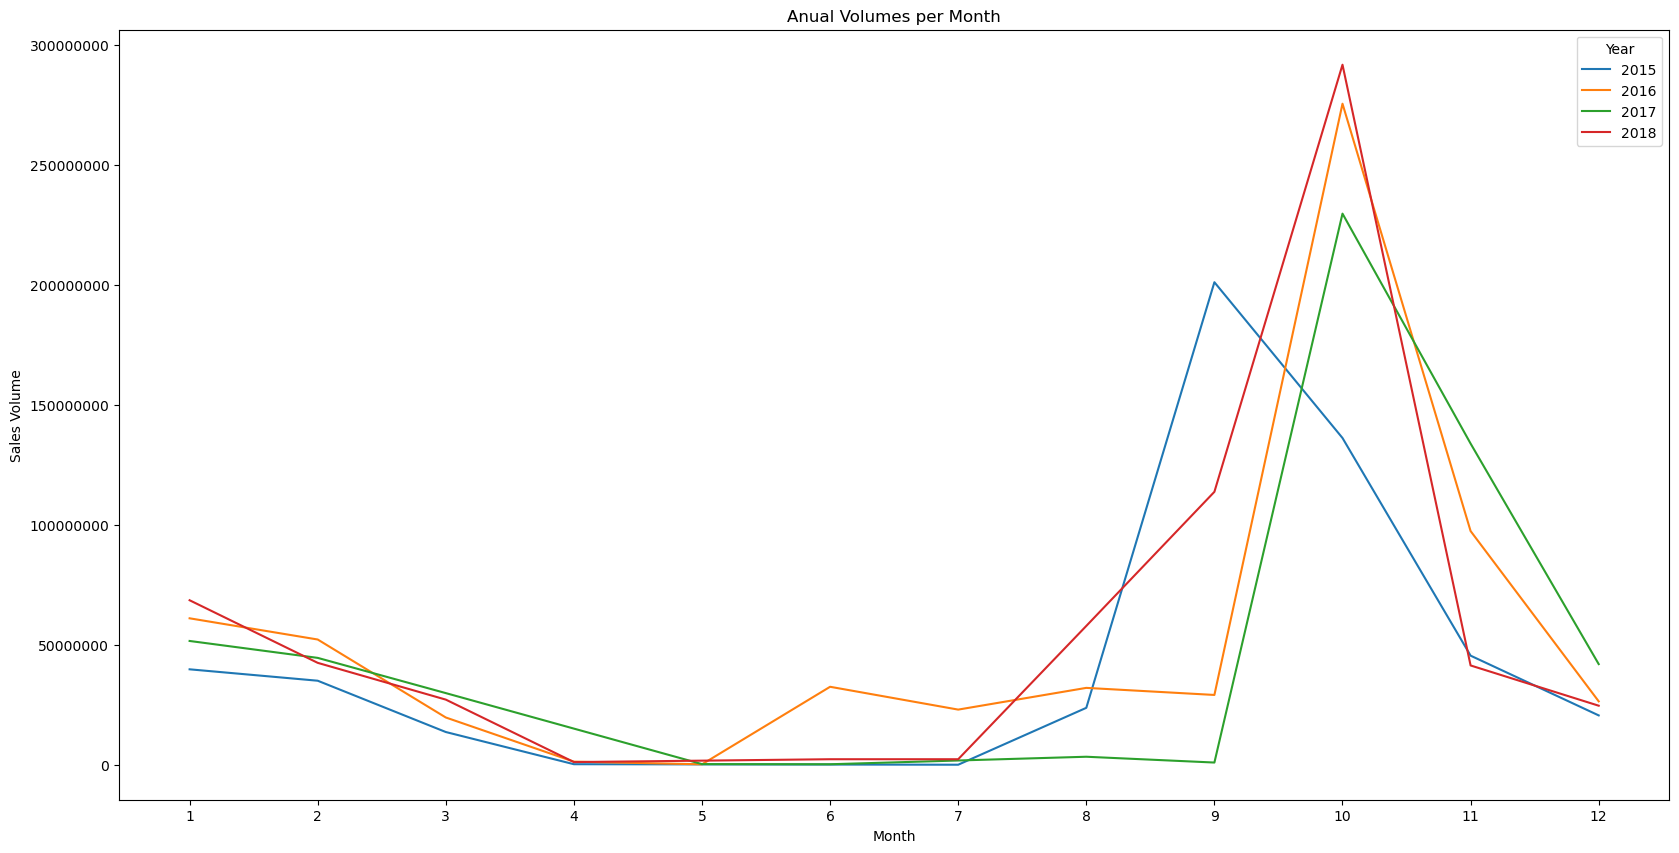

In [31]:
df2 = df[df['Month'] != 0]
df_15_18 = df2[(df2['Year'] >= 2015) & (df2['Year'] <= 2018)]
width = 20
height = 10
plt.figure(figsize=(width, height))
sns.lineplot(x='Month', y='SalesVolume', hue='Year', data=df_15_18, errorbar=None, palette='tab10', estimator="sum")
plt.ticklabel_format(style='plain', axis='y')
plt.title('Anual Volumes per Month')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.xticks(range(1,13))
plt.show()

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h1><a id="results_oct">Month Analysis (from 2015 to 2018)</a></h1>
    <h1> October Sales Volumes</h1><br>   
    <ul>
        <li><b>2015 Volume</b></li>
        <ul>
            <li> Total Volume: <b> 518,048,669.95</b>
            <li> October Volume Percentual: <b>26.33%</b> </li>
            <li> October Volume: <b> 136,394,118.6</b> </li>
        </ul>
        <br>
        <li><b>2016 Volume</b></li>
        <ul>
            <li> Total Volumes: <b> 653,140,219.08</b>
            <li> October Volume Percentual: <b>42.21%</b> </li>
            <li> October Volume: <b>275,696,969.81</b> </li>
        </ul>
        <br>
        <li><b>2017 Volume</b></li>
        <ul>
            <li> Total Volumes: <b> 538,543,786.49</b>
            <li> October Volume Percentual: <b>42.69%</b> </li>
            <li> October Volume: <b>229,892,487.46</b> </li>
        </ul>
        <br>
        <li><b>2018 Volume</b></li>
        <ul>
            <li> Total Volumes: <b> 675,799,500.52</b>
            <li> October Volume Percentual: <b>43.20%</b> </li>
            <li> October Volume: <b>291,943,471.07</b> </li>
        </ul>
        <br>
    </ul>
    
</div>

In [33]:
for year in range(2015,2019):
    df_year = df2.groupby(['Year','Month'])['SalesVolume'].sum()
    total = df_year[year].sum()
    
    oct_total = df_year[year,10].sum()
    
    oct_pct = (oct_total/total)*100
    
    print('Year ',year)
    print('Year Total: ',total)
    print('October Percentual: ', oct_pct)
    print('October Total: ', oct_total)
    print()

Year  2015
Year Total:  518048669.949
October Percentual:  26.328437174141868
October Total:  136394118.599

Year  2016
Year Total:  653140219.0785441
October Percentual:  42.210992640593425
October Total:  275696969.808

Year  2017
Year Total:  538543786.485
October Percentual:  42.687798694601256
October Total:  229892487.45700002

Year  2018
Year Total:  675799500.5160002
October Percentual:  43.199716905841065
October Total:  291943471.074



<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3><a id="month_2">Years: 2019 - 2022</a></h3>

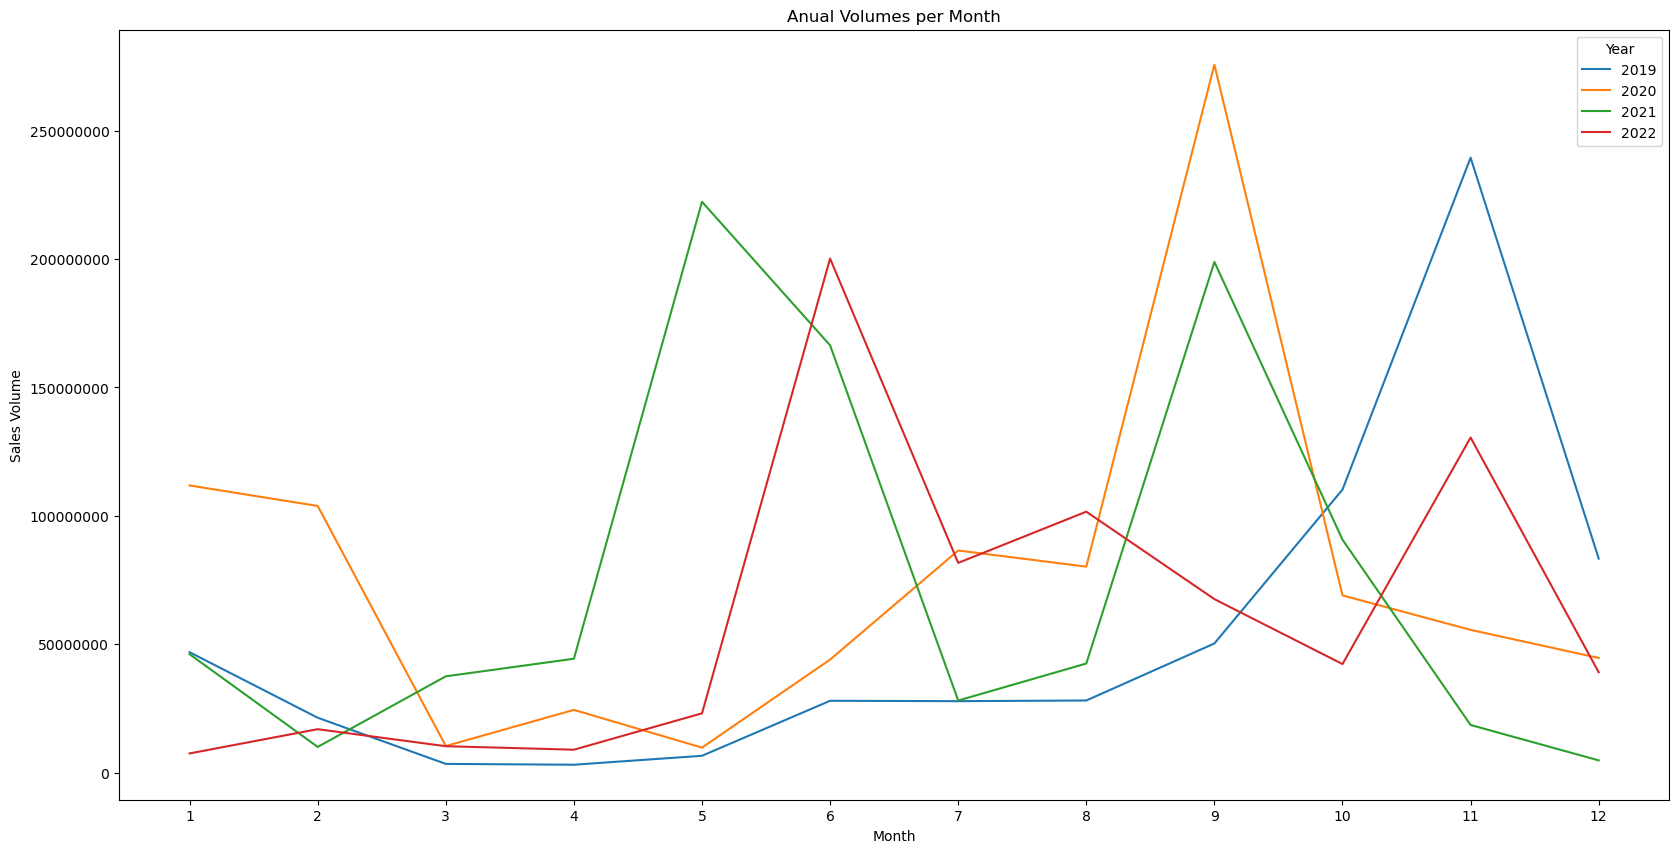

In [34]:
df_19_22 = df2[(df2['Year'] >= 2019)]
width = 20
height = 10
plt.figure(figsize=(width, height))
sns.lineplot(x='Month', y='SalesVolume', hue='Year', data=df_19_22, errorbar=None, palette='tab10', estimator="sum")
plt.title('Anual Volumes per Month')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(range(1,13))
plt.show()

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3><a id="month_3">Years: 2019 - 2022 Quarters</a></h3>

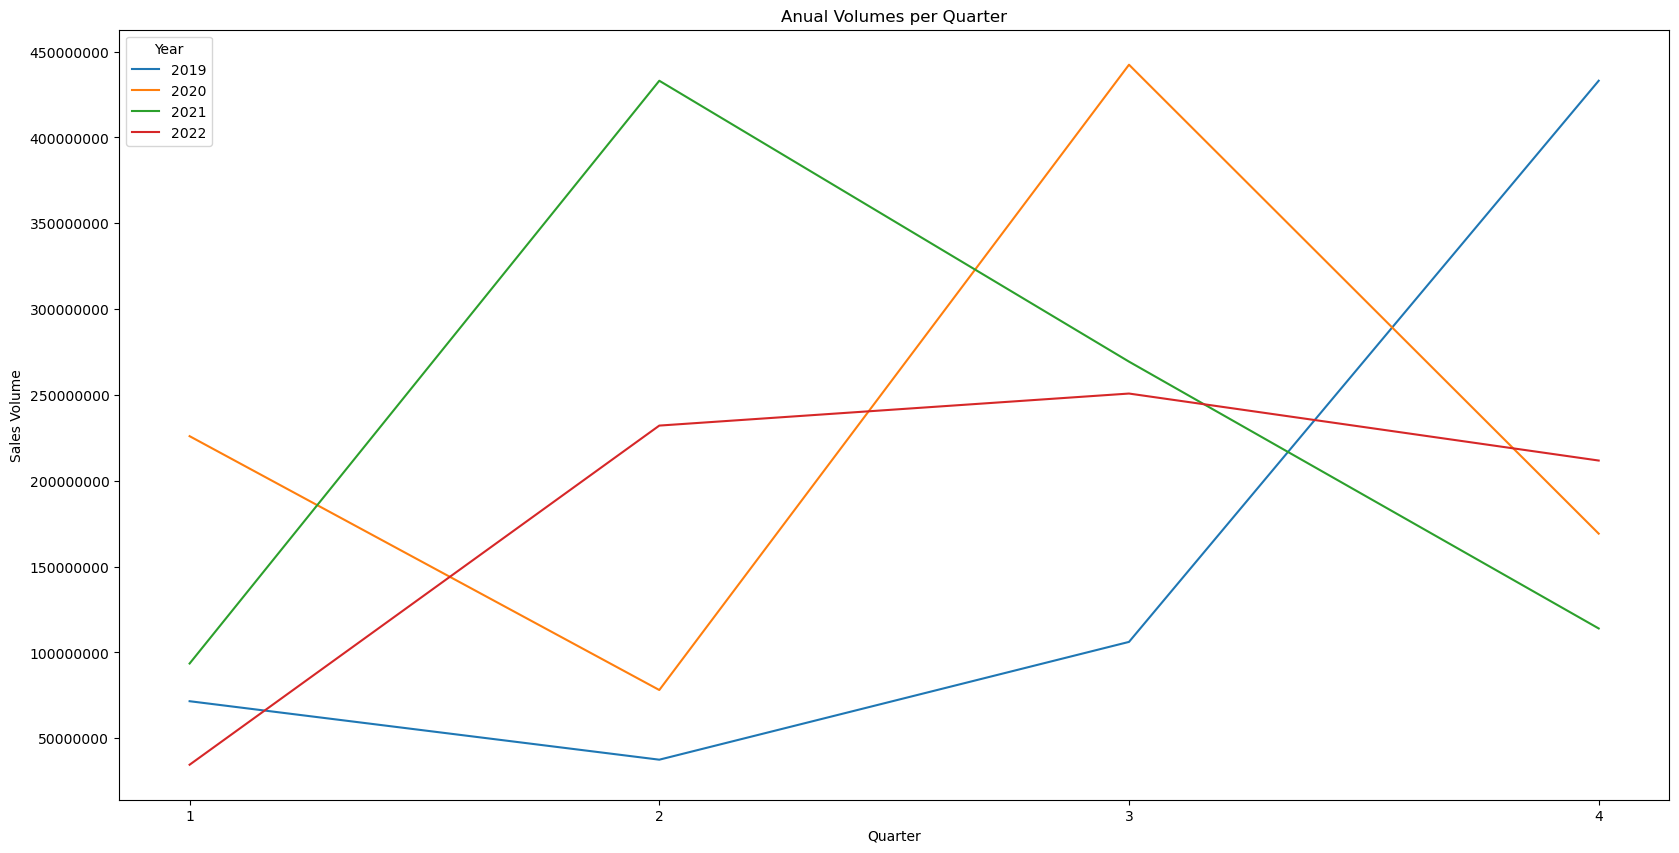

In [35]:
df_19_22 = df2[(df2['Year'] >= 2019)]
width = 20
height = 10
plt.figure(figsize=(width, height))
sns.lineplot(x='Quarter', y='SalesVolume', hue='Year', data=df_19_22, errorbar=None, palette='tab10', estimator="sum")
plt.title('Anual Volumes per Quarter')
plt.xlabel("Quarter")
plt.ylabel('Sales Volume')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(range(1,5))
plt.show()

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h1><a id="quarter_results">Quarters: 2019 - 2022</a></h1>
    <h1> Total Sales Volumes at Second Quarter</h1><br>   
    <ul>
        <li><b>2019 Volume</b></li>
        <ul>
            <li> Total Volume: <b>648,359,042.84</b>
            <li> Percentual Volume 2º Quarter: <b>5.79%</b> </li>
            <li> Volume 2º Quarter: <b>37,542,155.29</b> </li>
        </ul>
        <br>
        <li><b>2020 Volume</b></li>
        <ul>
            <li> Total Volume: <b> 915,729,268.22</b>
            <li> Percentual Volume 2º Quarter: <b>8.53%</b> </li>
            <li> Volume 2º Quarter: <b> 78,130,630.91</b> </li>
        </ul>
        <br>
        <li><b>2021 Volume</b></li>
        <ul>
            <li> Total Volume: <b> 910,009,293.43</b>
            <li> Percentual Volume 2º Quarter: <b>47.59%</b> </li>
            <li> Volume 2º Quarter: <b> 433,044,987.55</b> </li>
        </ul>
        <br>
        <li><b>2022 Volume</b></li>
        <ul>
            <li> Total Volume: <b> 729,404,983.24</b>
            <li> Percentual Volume 2º Trimestre: <b>31.83%</b> </li>
            <li> Volume 2º Quarter: <b> 232,164,351.79</b> </li>
        </ul>
    </ul>
    
</div>

In [36]:
for year in range(2019,2023):
    df_year = df2.groupby(['Year','Quarter'])['SalesVolume'].sum()    
    total = df_year[year].sum()
    
    quar_total = df_year[year,2].sum()
    
    quar_pct = (quar_total/total)*100
    
    print('Year ',year)
    print('Total Year: ',total)
    print('Percentual 2º Quarter: ', quar_pct)
    print('Total 2º Quarter: ', quar_total)
    print()

Year  2019
Total Year:  648359042.8499999
Percentual 2º Quarter:  5.790334183506639
Total 2º Quarter:  37542155.29

Year  2020
Total Year:  915729268.2221782
Percentual 2º Quarter:  8.532066585996322
Total 2º Quarter:  78130630.9121731

Year  2021
Total Year:  910009293.4300001
Percentual 2º Quarter:  47.58687528539078
Total 2º Quarter:  433044987.55

Year  2022
Total Year:  729404983.24
Percentual 2º Quarter:  31.82927963539971
Total 2º Quarter:  232164351.79



<div class="alert alert-block alert-info" style="margin-top: 20px">
<h1><a id="polyreg"> Polynomial Regression - 2023 Prediction</a> </h1>

<div class="alert alert-block alert-danger" style="margin-top: 20px">
    <h2> Score (using all variables, except UF): 24,58%  </h2>
</div>

In [37]:
df_new = pd.get_dummies(df, columns = ["DeliveryCropSemester"])

input = [("scalar", StandardScaler()), ("polynomial", PolynomialFeatures(degree=4)), ("model", LinearRegression())]

z = df_new[['Year','Month','WeeklyAdjustment','DeliveryYear','DeliveryCropSemester_Corn Crop','DeliveryCropSemester_Corn Crop - 1º Semester Deliver',
       'DeliveryCropSemester_Corn Crop - 2º Semester Deliver']]
y = df_new[['SalesVolume']]

x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.5, random_state=1)

pipe = Pipeline(input)
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)

0.24578018532782198

In [38]:
z = df_new[['Year','Month']]
y = df_new[['SalesVolume']]

x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.5, random_state=1)

pipe = Pipeline(input)
pipe.fit(x_train, y_train)

Pipeline(steps=[('scalar', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=4)),
                ('model', LinearRegression())])

In [39]:
pipe = Pipeline(input)
z2 = z.astype(float)
pipe.fit(z2, y)

Pipeline(steps=[('scalar', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=4)),
                ('model', LinearRegression())])

In [46]:
new_input = pd.DataFrame({2023:[1,2,3,4,5,6,7,8,9,10,11,12]})

In [47]:
b = pd.DataFrame(new_input.stack().reset_index())
b.rename(columns={'level_1':'Year', 0:'Month'}, inplace=True)
new_input = b[['Year', 'Month']]
new_input = new_input.sort_values(['Year', 'Month'])
new_input.head()

,Year,Month
0,2023,1
1,2023,2
2,2023,3
3,2023,4
4,2023,5


In [48]:
yhat = pipe.predict(new_input)
new_input['SalesVolume'] = yhat
new_input

,Year,Month,SalesVolume
0,2023,1,1.391171e+07
1,2023,2,6.261040e+06
2,2023,3,3.171309e+06
3,2023,4,2.818059e+06
4,2023,5,3.746888e+06
5,2023,6,4.873449e+06
6,2023,7,5.483451e+06
7,2023,8,5.232663e+06
8,2023,9,4.146906e+06
9,2023,10,2.622060e+06


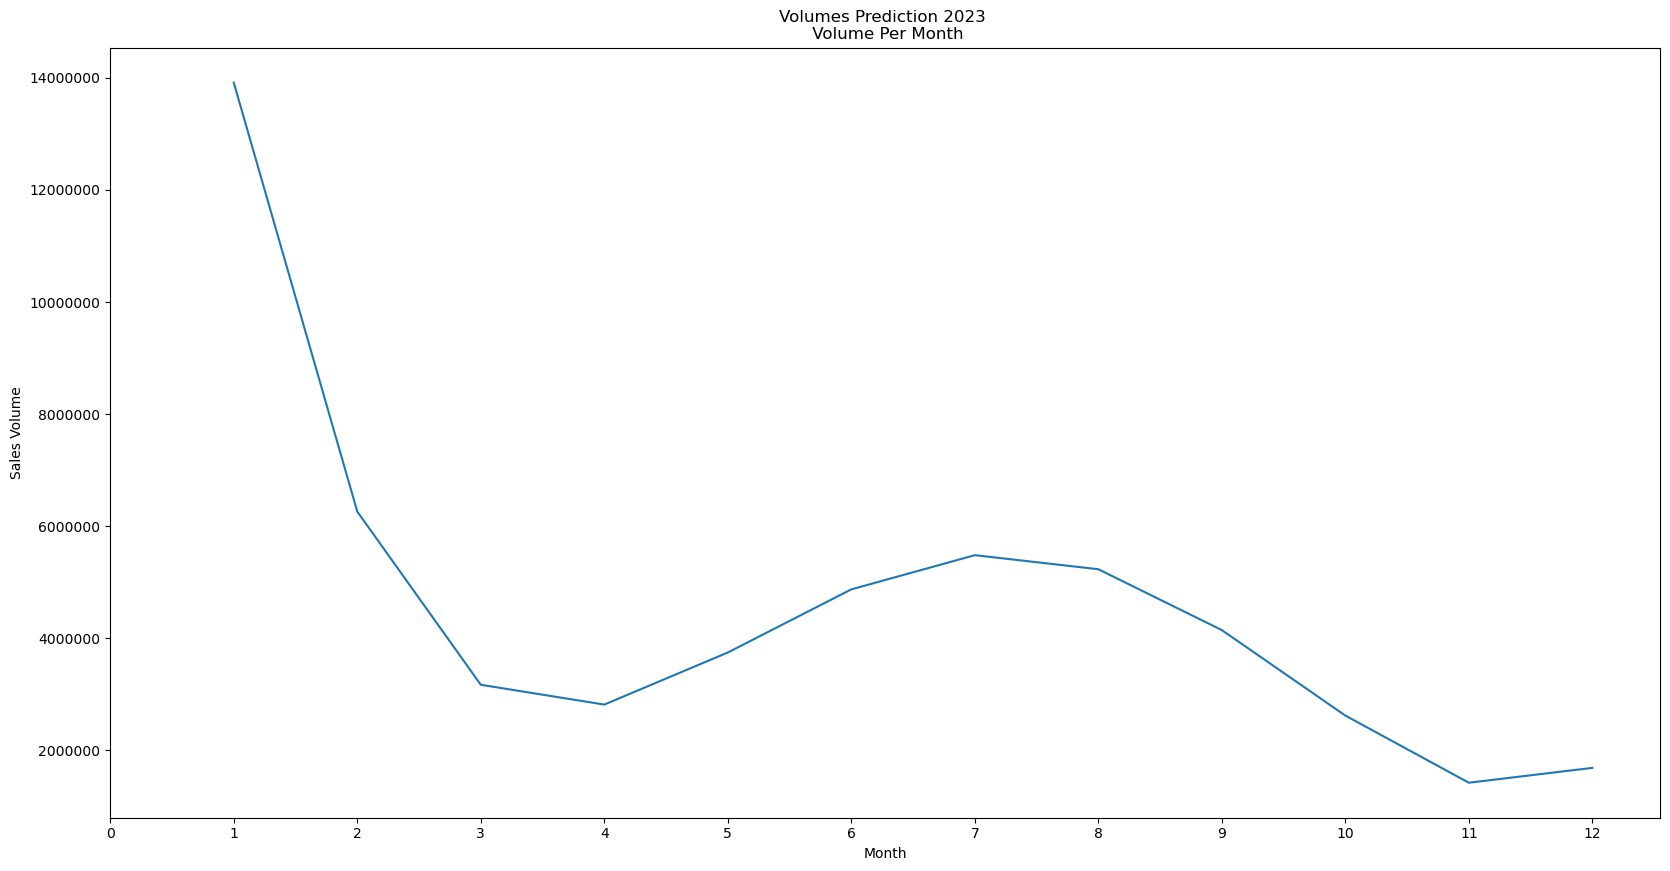

In [50]:
width = 20
height = 10
plt.figure(figsize=(width, height))
sns.lineplot(x='Month', y='SalesVolume', data=new_input, errorbar=None)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(range(0,13))
plt.title('Volumes Prediction 2023 \n Volume Per Month')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.show()

<div class="alert alert-block alert-success" style="margin-top: 20px">
    <h1><a id="end">Observations</a></h1>      
    <ul>
        <li><b>Possible reasons for 2019 decreasing:</b></li>
        <ul>
            <li> Truck drivers strike (2018) </li>
            <li> Brazil record harvests of 2017 and 2018 </li>
            <li> COVID-19 </li>
        </ul>
        <br>
        <li><b>Trends alteration from 2019:</b></li>
        <ul>
            <li> 1º semester deliveries volume increased more than the 2º semester deliveries </li>
            <li> Increasing of deliveries in the next year of the respective sales  </li>
            <li> Sales more well distributed through the months (not only october peaks) </li>
        </ul>
        <br>  
    </ul>       
    <h1>Conslusion</h1>      
    <ul>
        <li>The development and investments in cultivation technologies are increasingly boosting corn production, thereby also
            increasing the demand for fertilizers.</li>
        <li>Despite fluctuations in 2019, the fertilizer market has shown growth in sales volume since 2014.</li>
        <li>The changes between 2020 and 2022 are possibly a reflection of 2019 events, and the high growth rate of
            2021 (with the high delivery volumes at 1º semester, high delivery volumes at the next year of the sale and the
            high total volumes of the next years) may cause a little retraction in 2023 due to the surplus of the previous
            years.</li>
    </ul>
    <br>
    <h1>Recommendations</h1>      
    <ul>
        <li>Expand the database to include years prior to 2014.</li>
        <li>Include/correct the delivery semester indication of 2017 and the previous years</li>
        <li>Due to the non-linearity of the volume values, the forecasting tool used was polynomial regression. However, it is
            necessary to analyze more indicators that may correlate with the volumes to improve the forecasts and make the
            model more robust.</li>
    </ul>
</div>

<h2>Author</h2>

<b>Luiz Felipe R. Noro</b><br>
<i> Data Analyst<br>
    Bachelor degree in Electrical Engineer</i>